In [3]:
import sympy
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs
from IPython.display import display
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [4]:
init_vprinting()

In [5]:
t = Symbol('t')
u, v, teta, psi = dynamicsymbols('u v theta psi')

In [49]:
symrep1 = (
'm I_d I_p Omega k_x1 k_x2 k_y1 k_y2 a b')
m, Id, Ip, omega, kx1, kx2, ky1, ky2, a, b = symbols(symrep1, positive=True)
symrep2 = (
'k_xT k_xC k_xR k_yT k_yC k_yR k_T k_C k_R')
kxt, kxc, kxr, kyt, kyc, kyr, kt, kc, kr = symbols(symrep2, positive=True)

In [7]:
C1, C2 = symbols('C1 C2')

In [8]:
eq1 = m*(u.diff(t, t)) + (kx1 + kx2)*u + (-a*kx1 + b*kx2)*psi

In [9]:
eq2 = m*(v.diff(t, t)) + (ky1 + ky2)*v + (a*ky1 - b*ky2)*teta

In [10]:
eq3 = Id*(teta.diff(t, t)) + Ip*omega*(psi.diff(t)) + (a*ky1 - b*ky2)*v + (a**2*ky1 + b**2*ky2)*teta

In [11]:
eq4 = Id*(psi.diff(t, t)) - Ip*omega*(teta.diff(t)) + (-a*kx1 + b*kx2)*u + (a**2*kx1 + b**2*kx2)*psi

In [12]:
system = [eq1, eq2, eq3, eq4]

In [13]:
for i in system:
    display(i)

In [14]:
subs1 = [(kx1 + kx2, kxt),
         (ky1 + ky2, kyt),
         (-a*kx1 + b*kx2, kxc),
         (-a*ky1 + b*ky2, kyc),
         (a**2*kx1 + b**2*kx2, kxr),
         (a**2*ky1 + b**2*ky2, kyr)]

In [15]:
system2 = []
for eq in system:
    eq_ = eq.subs(subs1)
    system2.append(eq_)

In [16]:
for i in system2:
    display(i)

In [17]:
#Isotropic Flexible Supports
subs_iso = [(kxt, kt), (kyt, kt), (kxc, kc), (kyc, kc), (kxr, kr), (kyr, kr)]
system_iso = []
for eq in system2:
    eq_ = eq.subs(subs_iso)
    system_iso.append(eq_)

In [18]:
for i in system_iso:
    display(i)

In [19]:
#3.5.1 Neglecting Gyroscopic Effects and Elastic Coupling
subs351 = [(Ip*omega, 0), (kc, 0)]
system_iso_351 = []
for eq in system_iso:
    eq_ = eq.subs(subs351)
    system_iso_351.append(eq_)

In [20]:
for i in system_iso_351:
    display(i)

In [21]:
system_iso_351

In [22]:
system_iso_351_sol = []
for eq in system_iso_351:    
    system_iso_351_sol.append(dsolve(eq))

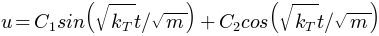

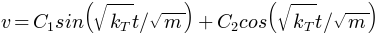

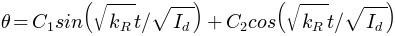

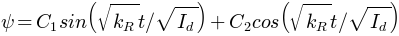

In [23]:
for i in system_iso_351_sol:
    display(i)

In [24]:
example351 = [(m, 122.68), (Ip, 0.6134), (Id, 2.8625), (kt, 2*10**6), (kr, 125*10**3), (kc, 0)]

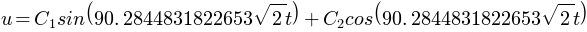

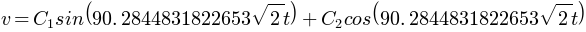

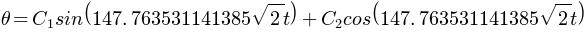

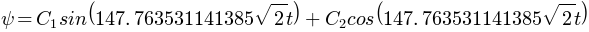

In [25]:
example351_sol = []
for eq in system_iso_351_sol:
    eq_ = eq.subs(example351)
    example351_sol.append(eq_)

for i in example351_sol:
    display(i)

In [26]:
def solve_constants(eq, ics, d_ics):
    udiff = Eq(d_ics[0][1], eq.rhs.diff(t))
    C_1 = solve(eq.subs(ics), {C1, C2})
    C_2 = solve(udiff.subs(t, 0), {C1, C2})
    consts = {}
    consts.update(C_1[0])
    consts.update(C_2[0])
    return eq.subs(consts)

In [27]:
ics = [[(u, 0.001), (t, 0)],
       [(v, 0.0005), (t, 0)]]
d_ics = [[(u, 0.030), (t, 0)],
         [(v, 0), (t, 0)]]

example351_sol_2 = []
for eq in enumerate(example351_sol[:2]):
    soln = solve_constants(eq[1], ics[eq[0]], d_ics[eq[0]])
    example351_sol_2.append(soln)
    
for i in example351_sol_2:
    display(i)

In [151]:
x1 = lambdify(t, example351_sol_2[0].rhs, 'numpy')
y1 = lambdify(t, example351_sol_2[1].rhs, 'numpy')

In [152]:
t1 = sp.linspace(0, 0.2, 100)   

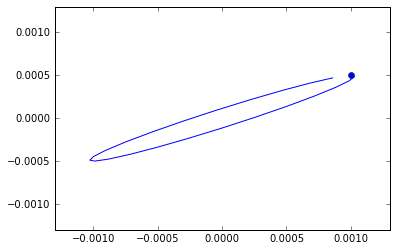

In [165]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_xlim([-0.0013, 0.0013])
ax1.set_ylim([-0.0013, 0.0013])
ax1.plot(x1(t1[0]), y1(t1[0]), 'bo')
ax1.plot(x1(t1[:24]), y1(t1[:24]))

In [163]:
ax1.plot?

In [214]:
class Rotor(object):
    sys_of_eqs = system
    
    def __init__(self):
        self.model = system
                
    def define_model(self, parameters):
        new_sys = []
        for eq in self.model:
            eq_ = eq.subs(parameters)
            new_sys.append(eq_)
            self.model = new_sys
            
    def solve_model(self, ics, d_ics):
        model_soln = []
        for eq in self.model:
            model_soln.append(dsolve(eq))
            
        def solve_constants(eq, ics, d_ics):
            udiff = Eq(d_ics[0][1], eq.rhs.diff(t))
            C_1 = solve(eq.subs(ics), {C1, C2})
            C_2 = solve(udiff.subs(t, 0), {C1, C2})
            consts = {}
            consts.update(C_1[0])
            consts.update(C_2[0])
            return eq.subs(consts)
        
        model_soln_f =[]
        for eq in enumerate(model_soln[:len(ics)]):
            soln = solve_constants(eq[1], ics[eq[0]], d_ics[eq[0]])
            model_soln_f.append(soln)
        
        self.model_response = model_soln_f
        self.x = lambdify(t, model_soln_f[0].rhs, 'numpy')
        self.y = lambdify(t, model_soln_f[1].rhs, 'numpy')

    def orbit(self):
        t1 = sp.linspace(0, 0.2, 100)  
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)  
        ax1.set_xlim([-0.0013, 0.0013])
        ax1.set_ylim([-0.0013, 0.0013])
        ax1.plot(self.x(t1[0]), self.y(t1[0]), 'bo')
        ax1.plot(self.x(t1[:24]), self.y(t1[:24]))
        

In [220]:
rot1 = Rotor()

In [216]:
subs1_ = [(kx1 + kx2, kxt),
         (ky1 + ky2, kyt),
         (-a*kx1 + b*kx2, kxc),
         (-a*ky1 + b*ky2, kyc),
         (a**2*kx1 + b**2*kx2, kxr),
         (a**2*ky1 + b**2*ky2, kyr)]
subs_iso1 = [(kxt, kt), (kyt, kt), (kxc, kc), (kyc, kc), (kxr, kr), (kyr, kr)]
subs3511 = [(Ip*omega, 0), (kc, 0)]
example3511 = [(m, 122.68), (Ip, 0.6134), (Id, 2.8625), (kt, 2*10**6), (kr, 125*10**3), (kc, 0)]

In [221]:
rot1.define_model(subs1_)
rot1.define_model(subs_iso1)
#rot1.define_model(subs3511)
#rot1.define_model(example3511)

In [223]:
print(rot1.model)

[k_C*psi(t) + k_T*u(t) + m*Derivative(u(t), t, t), -k_C*theta(t) + k_T*v(t) + m*Derivative(v(t), t, t), I_d*Derivative(theta(t), t, t) + I_p*Omega*Derivative(psi(t), t) - k_C*v(t) + k_R*theta(t), I_d*Derivative(psi(t), t, t) - I_p*Omega*Derivative(theta(t), t) + k_C*u(t) + k_R*psi(t)]


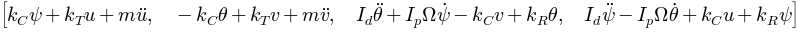

In [103]:
rot1.model

In [105]:
rot1.model

In [107]:
rot1.model

In [218]:
ics = [[(u, 0.001), (t, 0)],
       [(v, 0.0005), (t, 0)]]
d_ics = [[(u, 0.030), (t, 0)],
         [(v, 0), (t, 0)]]

rot1.solve_model(ics, d_ics)

In [ ]:
rot

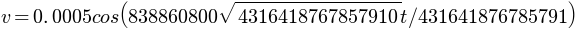

In [208]:
rot1.model_response[1]


In [209]:
rot1.x(1)

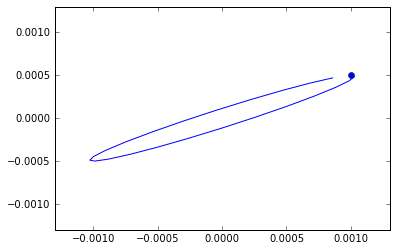

In [219]:
rot1.orbit()